# Pinning checks

In [1]:
from qiskit import QuantumCircuit
from qiskit.transpiler import Layout, CouplingMap

from qiskit_ibm_runtime.fake_provider import *

from quantem.pin_qubits import pin_qubits

### Create example circuit: Toffoli with three controls

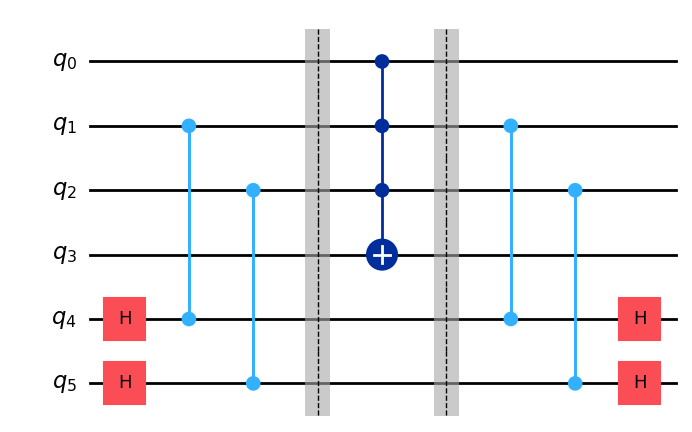

In [2]:
qc_1 = QuantumCircuit(6)

qc_1.h(4)
qc_1.cz(4, 1)
qc_1.h(5)
qc_1.cz(5, 2)
qc_1.barrier()
qc_1.mcx([0, 1, 2], 3)
qc_1.barrier()
qc_1.cz(4, 1)
qc_1.h(4)
qc_1.cz(5, 2)
qc_1.h(5)
qc_1.draw("mpl", fold=-1)

### Create a layout and pin qubits

In [3]:
coupling_map = [
    [0, 1],
    [1, 0],
    [1, 2],
    [2, 1],
    [2, 3],
    [3, 2],
    [3, 4],
    [4, 3],
    [4, 5],
    [5, 4],
]
coupling_map = CouplingMap(coupling_map)

basis_gates = ["rz", "sx", "x", "cx"]
layout = [2, 1, 4, 3, 0, 5]  # {q_reg[0]:0, q_reg[2]:1}
layout = Layout.from_intlist(layout, *qc_1.qregs)

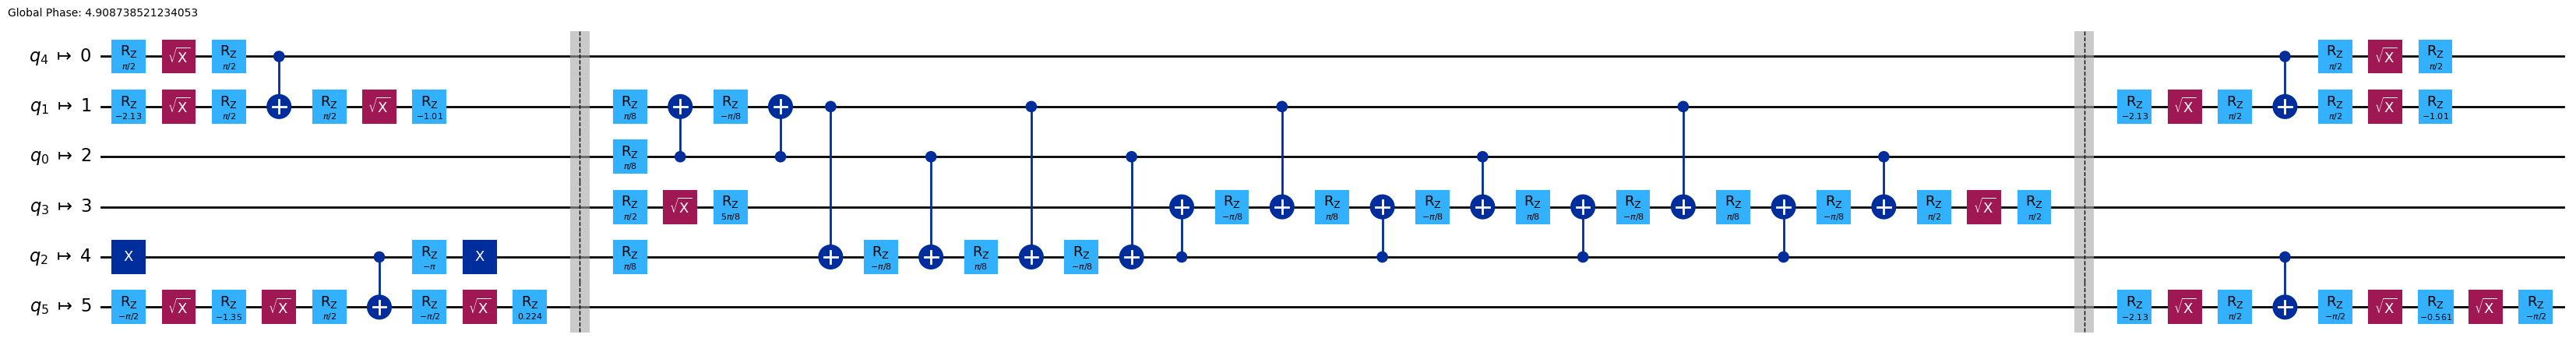

In [4]:
qc_pinned = pin_qubits(
    qc_1,
    layout,
    coupling_map,
    basis_gates,
    pinned_qubits=[0, 5],
    optimization_level=3,
    seed=None,
)
qc_pinned.draw("mpl", fold=-1)

### Pin qubits on Fake Backend

In [5]:
fake_backend = FakeWashingtonV2()

In [6]:
fake_backend.num_qubits

127

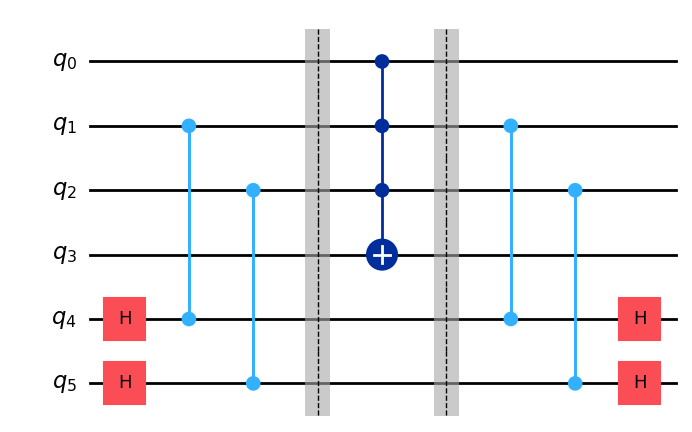

In [7]:
qc_1 = QuantumCircuit(127)

qc_1.h(4)
qc_1.cz(4, 1)
qc_1.h(5)
qc_1.cz(5, 2)
qc_1.barrier()
qc_1.mcx([0, 1, 2], 3)
qc_1.barrier()
qc_1.cz(4, 1)
qc_1.h(4)
qc_1.cz(5, 2)
qc_1.h(5)
qc_1.draw("mpl", fold=-1, idle_wires=False)

In [8]:
# need helper for this. circuit qubits must match layout and coupliing map
# todo: inform initial layout using Mapomatic
layout_fake_backend = [2, 1, 4, 3, 0, 5] + list(range(6, 127))

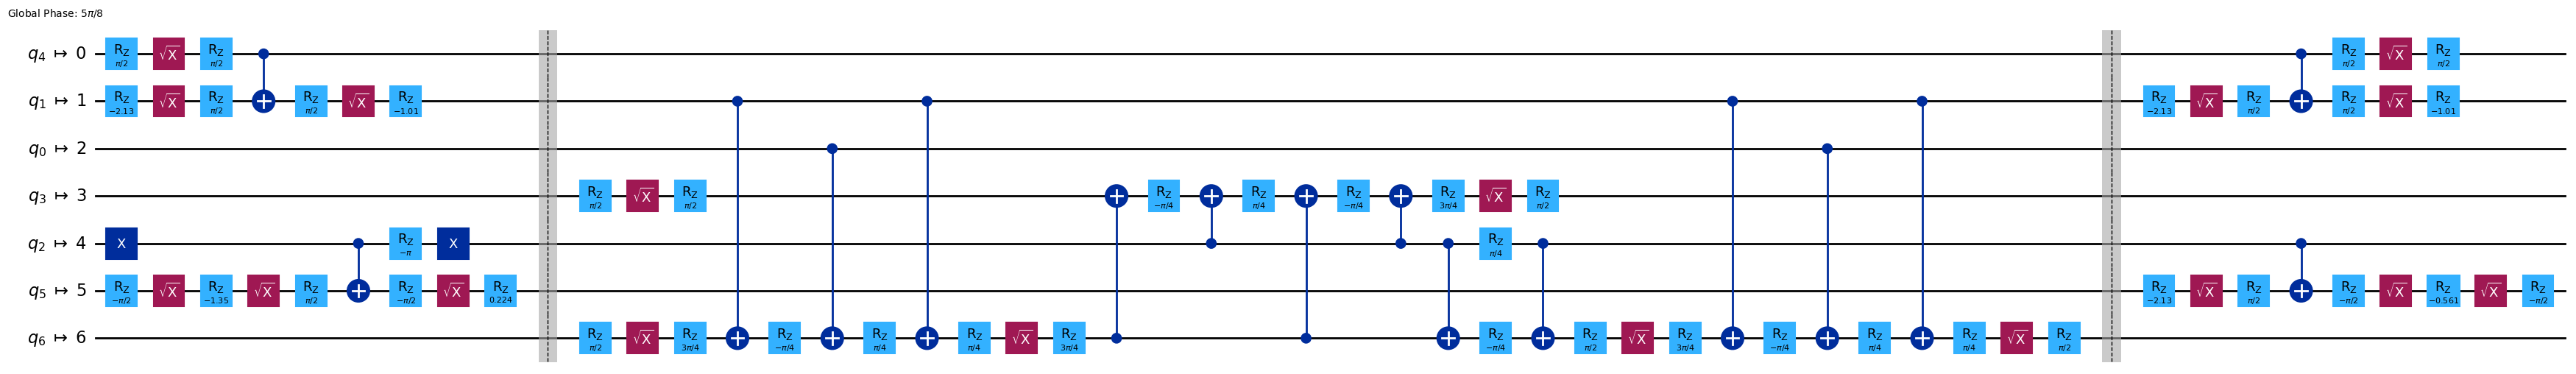

In [9]:
qc_pinned_fake_backend = pin_qubits(
    qc_1,
    layout_fake_backend,
    fake_backend.coupling_map,
    fake_backend.configuration().basis_gates,
    pinned_qubits=[0, 5],
    optimization_level=3,
    seed=None,
)
qc_pinned_fake_backend.draw("mpl", fold=-1, idle_wires=False)